# Predicting customer churn at a bank


In [1]:
import numpy as np # For data manipulation
import pandas as pd # For data representation
import matplotlib.pyplot as plt # For basic visualization
import seaborn as sns 

In [2]:
# Importing the dataset
churn_dataset = pd.read_csv('Churn_Modelling.csv')
# Visualizing first five elements in the dataset
churn_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_dataset.isnull().sum()

In [3]:
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
churn_dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
for col in churn_dataset.columns:  # Looping over all columns 
    if churn_dataset[col].dtypes == 'object':
        num_of_unique_cat = len(churn_dataset[col].unique()) # Checking the length of unique characters
        print("feature '{col_name}' has '{unique_cat}' unique categories".format(col_name = col, unique_cat=num_of_unique_cat))

feature 'Surname' has '2932' unique categories
feature 'Geography' has '3' unique categories
feature 'Gender' has '2' unique categories


In [6]:
churn_dataset.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
visualization_1 = churn_dataset.pivot_table("Exited", index="Gender", columns="Geography")
visualization_1

Geography,France,Germany,Spain
Gender,,,
Female,0.203450,0.375524,0.212121
Male,0.127134,0.278116,0.131124


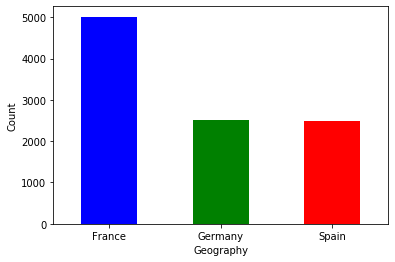

In [8]:
plt.figure(figsize=(6,4))
churn_dataset['Geography'].value_counts().plot.bar(color=['b', 'g', 'r'])
plt.ylabel('Count')
plt.xlabel('Geography')
plt.xticks(rotation=0)
plt.show()

# Display count of each class
#Counter(churn_dataset.Geography)


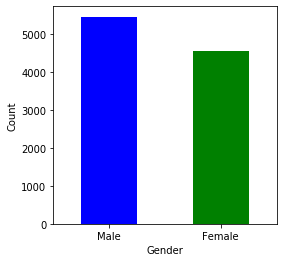

In [9]:
# Bar plot for "Gender"
plt.figure(figsize=(4,4))
churn_dataset['Gender'].value_counts().plot.bar(color=['b', 'g'])
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

# Display count of each class
#Counter(churn_dataset.Gender)

In [10]:
churn_dataset = churn_dataset.drop("Surname", axis=1)

In [11]:
churn_dataset = churn_dataset.drop(["Geography", "Gender"], axis=1)

In [12]:
churn_dataset = churn_dataset.drop(["RowNumber", "CustomerId"], axis=1)

In [19]:
churn_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


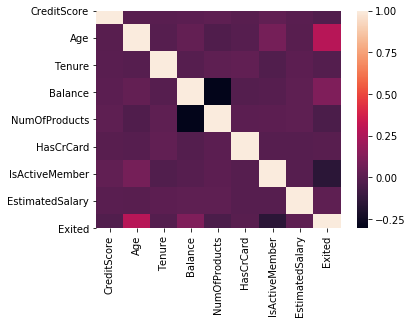

In [13]:
correlation = churn_dataset.corr()
sns.heatmap(correlation.T, square=True, annot=False, fmt="d", cbar=True)

In [14]:
churn_dataset.shape

(10000, 9)

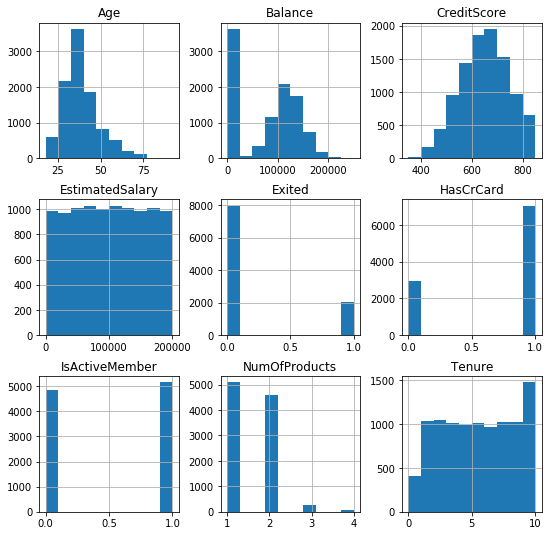

In [15]:
churn_dataset.hist(figsize=(9,9))

plt.show()

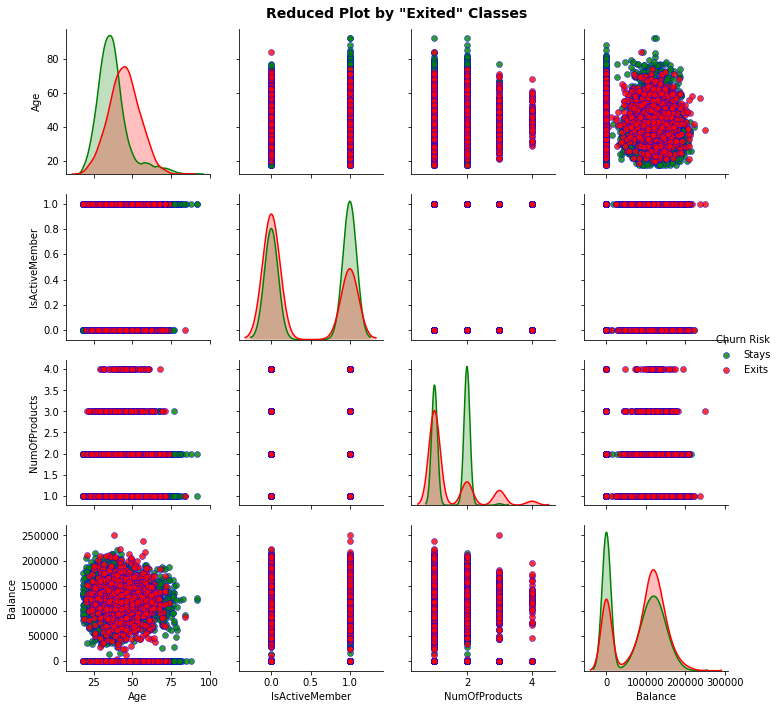

In [16]:
g = sns.pairplot(churn_dataset, hue='Exited',
                 vars=['Age', 'IsActiveMember', 'NumOfProducts', 'Balance'], # reduce to less features
                 palette={0 : 'green',
                          1 : 'red'},
                 plot_kws={'alpha' : 0.8, 'edgecolor' : 'b', 'linewidth' : 0.5})

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Reduced Plot by "Exited" Classes',
             fontsize=14,
             fontweight='bold')

# Update the legend
new_title = 'Churn Risk'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Stays', 'Exits']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show()

In [17]:
train_data=churn_dataset.iloc[:5000,]
test_data=churn_dataset.iloc[5001:,]

In [18]:
train_data.to_csv('~/Desktop/Churn_train.csv')
test_data.to_csv('~/Desktop/Churn_test.csv')